In [1]:
"""
Created on Wed Sep 27 15:20:54 2017

@author: aditya
"""
# Imports and Initial Output File Handling
from bokeh.io import *
from bokeh.plotting import figure
import pandas as pd
from bokeh.models import ColumnDataSource
from bokeh.layouts import column, row
from bokeh.models import HoverTool
from bokeh.palettes import Spectral6
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn import cluster

output_notebook()

Loading BokehJS ...

In [2]:
#Reading in Data
df = pd.read_csv('Wholesale customers data.csv')

#Converting a pandas dataframe to a numpy array for sklearn convenience.
df_np = df.values

In [3]:
#Clustering using sci-kit learn
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_np)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [4]:
#Plotting Milk vs Grocery
p = figure(plot_width=400, plot_height=400)
    
for i in range(k):
    # select only data observations with cluster label == i
    ds = df_np[np.where(labels==i)]
    
    #Add a circle renderer with a size, color, and alpha
    p.circle(ds[:,3],ds[:,4], size=ds[:,1]*8, color = Spectral6[i], 
          alpha=0.8, legend = "Clustered Values {}".format(i))
    
    # plot the centroids
    p.diamond_cross(centroids[i,3],centroids[i,4], color = Spectral6[i+3], 
          alpha=0.8, legend = "Centroid {}".format(i), size = 50)

#Customizing attributes 
p.title.text = "Milk vs Grocery"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Milk'
p.yaxis.axis_label = 'Grocery'

#Adding interactions with the legend for better viewing capabilities of clusters.
p.legend.click_policy = "hide"

In [5]:
#Plotting Milk vs Frozen
p1 = figure(plot_width=400, plot_height=400)
    
for i in range(k):
    # select only data observations with cluster label == i
    ds = df_np[np.where(labels==i)]
    
    #Add a circle renderer with a size, color, and alpha
    p1.circle(ds[:,3],ds[:,6], size=ds[:,1]*10, color = Spectral6[i], 
          alpha=0.8, legend = "Clustered Values {}".format(i))
    
    # plot the centroids
    p1.diamond_cross(centroids[i,3],centroids[i,6], color = Spectral6[i+3], 
          alpha=0.8, legend = "Centroid {}".format(i), size = 50)

#Customizing attributes 
p1.title.text = "Milk vs Frozen"
p1.legend.location = "top_left"
p1.grid.grid_line_alpha=0
p1.xaxis.axis_label = 'Milk'
p1.yaxis.axis_label = 'Frozen'
#Adding interactions with the legend for better viewing capabilities of clusters.
p1.legend.click_policy = "hide"

In [6]:
#Plotting Milk vs Region
p2 = figure(plot_width=400, plot_height=400)
    
for i in range(k):
    # select only data observations with cluster label == i
    ds = df_np[np.where(labels==i)]
    
    #Add a circle renderer with a size, color, and alpha
    p2.circle(ds[:,3],ds[:,1], size=15, color = Spectral6[i], 
          alpha=0.8, legend = "Clustered Values {}".format(i))
    
    # plot the centroids
    p2.diamond_cross(centroids[i,3],centroids[i,1], color = Spectral6[i+3], 
          alpha=0.8, legend = "Centroid {}".format(i), size = 50)

#Customizing attributes 
p2.title.text = "Milk vs. Region"
p2.legend.location = "bottom_right"
p2.grid.grid_line_alpha=0
p2.xaxis.axis_label = 'Milk'
p2.yaxis.axis_label = 'Region'
p2.legend.click_policy = "hide"

In [7]:
# Showing Results
grid = gridplot([[p, p1], [p2, None]])
show(grid)

#Understanding the Results:
#-Milk vs Grocery
# - When individual cluster points are seen, by disabling the other clusters, we can clearly see
#   the centroids are perfectly aligned. 
# - Further, the size of the cluster points are determined on the basis of the region of the data.
#
#-Milk vs Frozen
# - Playing around with the wheel zoom and box zoom shows us interesting clusters.
# 
#
#-Milk vs Region
# - We can see that the clusters are somewhat correlated with the amount of milk expenditure across
# the regions.

0.842501808295
[[  97.           98.          278.91575789    2.        ]
 [ 299.          355.          344.88548824    2.        ]
 [ 114.          217.          412.89465969    2.        ]
 [  80.          308.          421.59696394    2.        ]
 [ 134.          146.          437.59227598    2.        ]
 [ 388.          399.          488.5048618     2.        ]
 [ 327.          441.          547.07677706    3.        ]
 [ 352.          446.          586.81854095    4.        ]
 [ 206.          369.          632.01028473    2.        ]
 [ 194.          443.          643.00388801    3.        ]
 [  83.          387.          661.60940138    2.        ]
 [ 168.          448.          667.8001198     3.        ]
 [  58.          336.          689.00507981    2.        ]
 [ 203.          447.          788.85740156    5.        ]
 [ 326.          400.          791.91539952    2.        ]
 [ 389.          395.          812.40507138    2.        ]
 [ 199.          366.          827.868950

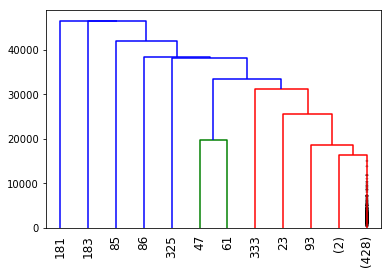

In [8]:
# Hierarchical Clustering Implementation-------------------------------------------------------
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#For Handling the display of the graphics to display from ipython interactive console (dendrogram)
from matplotlib.pyplot import show

#Using Euclidean distance for maximum Cophenetic Correlation Coefficient
Z = linkage(df_np) 
c, coph_dists = cophenet(Z, pdist(df_np))

#Cophenetic Correlation Coefficient closer to 1 determines preservation of 
#                                                                     the original distances.
print(c)

#Viewing clustering
# Of the form: {idx, idx, distance, sample_count}
print(Z[:20])

dendrogram(
    Z,
    truncate_mode='lastp',  #Method for truncation
    p=12,  # Showing the last p mergings
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
show()

In [9]:
#Discussing observations from hierarchical clustering

# We can see here that most of the clustering, out of the 440 observations took place in 
# the first 428 clusters, observe the value in brackets to the right, but some values- namely
# the ones listed from left to the right, upto the ones before the bracket-values are different
# from those clusters. We also saw some values having very huge values in the k-means clustering
# results. Possible correlation here. 